In [11]:
import hdbscan
import numpy as np
from sklearn.metrics import v_measure_score
from sklearn.cluster import KMeans
import umap    
import umap.plot

from pathlib import Path
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, SimilarityFunction
import sys
import os

SCRIPT_DIR = Path.cwd().parent
sys.path.insert(0, str(SCRIPT_DIR))

from embeddings.embedding_library import EmbeddingLibrary

In [4]:
path_to_papers = Path(r'../papers')
path_to_embs = Path(r'../data/embeddings')

# should all be lower case
end_of_paper_words = [
    'references',
    'acknowledgements', 
    'acknowledgement',
]

papers_to_skip = [
    '2311.11329v2_content.txt',
    '2411.09324v2_content.txt',
    '2411.14259v1_content.txt'
]

In [36]:
model = SentenceTransformer('sentence-transformers/all-distilroberta-v1', device='cuda')

In [47]:
model.encode(['hello from the beyond', 'this is the end my firend']).shape

Batches: 100%|██████████| 1/1 [00:00<00:00, 14.24it/s]


(2, 768)

In [40]:
emb_lib = EmbeddingLibrary(
    path_to_papers=path_to_papers,
    path_to_embs=path_to_embs,
    model=model,
    end_of_paper_words=end_of_paper_words,
    papers_to_skip=papers_to_skip,
    name="Prototype",
    path_to_log=Path("../log")
)

In [45]:
x1 = np.array([[1,2,3], [1,2,3]])
x2 = np.array([[1,2,3], [1,2,3], [1,2,3]])

x3 = np.concatenate([x1, x2])
x3.mean(axis=0).shape

(3,)

In [41]:
emb_lib.multi_sec_embed(skip_existing=False)

Batches: 100%|██████████| 1/1 [00:00<00:00, 37.24it/s]


SHIT
cannot reshape array of size 1 into shape (1,768)


ValueError: cannot reshape array of size 1 into shape (1,768)

In [8]:
embs = emb_lib.get_full_paper_embs()

In [22]:
mapper = umap.UMAP().fit(embs)

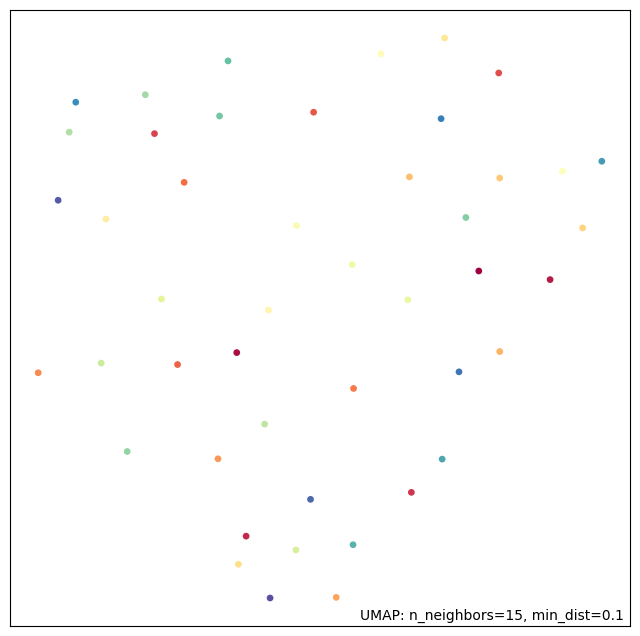

In [34]:

p = umap.plot.points(mapper, labels=pd.Series([i for i in range(embs.shape[0])]), show_legend=False)
umap.plot.show(p)